# Retail AI HiveMind: Multi-Agent System for Smart Inventory Optimization


# Step 1: Load and Explore All Datasets

In [4]:
# Step 1: Import necessary libraries
import pandas as pd

# Step 2: Load datasets
df_demand = pd.read_csv("C:/Users/SHASHANK/OneDrive/Documents/Retail AI HiveMind Multi-Agent System for Smart Inventory Optimization/[use case 1] Inventory Optimization for Retail/demand_forecasting.csv")
df_inventory = pd.read_csv("C:/Users/SHASHANK/OneDrive/Documents/Retail AI HiveMind Multi-Agent System for Smart Inventory Optimization/[use case 1] Inventory Optimization for Retail/inventory_monitoring.csv")
df_pricing = pd.read_csv("C:/Users/SHASHANK/OneDrive/Documents/Retail AI HiveMind Multi-Agent System for Smart Inventory Optimization/[use case 1] Inventory Optimization for Retail/pricing_optimization.csv")

# Step 3: Preview datasets
print("Demand Forecasting Data:")
display(df_demand.head())

print("\n Inventory Monitoring Data:")
display(df_inventory.head())

print("\n Pricing Optimization Data:")
display(df_pricing.head())

Demand Forecasting Data:


,Product ID,Date,Store ID,Sales Quantity,Price,Promotions,Seasonality Factors,External Factors,Demand Trend,Customer Segments
0,4277,2024-01-03,48,330,24.38,No,Festival,Competitor Pricing,Increasing,Regular
1,5540,2024-04-29,10,334,74.98,Yes,Holiday,Weather,Stable,Premium
2,5406,2024-01-11,67,429,24.83,Yes,Holiday,Economic Indicator,Decreasing,Premium
3,5617,2024-04-04,17,298,13.41,No,NaN,Economic Indicator,Stable,Regular
4,3480,2024-12-14,33,344,94.96,Yes,Festival,Weather,Increasing,Regular



 Inventory Monitoring Data:


,Product ID,Store ID,Stock Levels,Supplier Lead Time (days),Stockout Frequency,Reorder Point,Expiry Date,Warehouse Capacity,Order Fulfillment Time (days)
0,9286,16,700,10,14,132,2024-01-15,1052,6
1,2605,60,82,11,1,127,2024-12-16,1262,9
2,2859,55,145,25,14,192,2024-04-30,1457,12
3,2374,24,151,17,6,19,2024-12-16,2944,3
4,7678,5,714,12,2,21,2024-08-05,3739,7



 Pricing Optimization Data:


,Product ID,Store ID,Price,Competitor Prices,Discounts,Sales Volume,Customer Reviews,Return Rate (%),Storage Cost,Elasticity Index
0,9502,13,31.61,56.14,19.68,255,3,13.33,6.72,1.78
1,2068,77,35.51,63.04,16.88,5,3,1.50,8.38,1.67
2,7103,59,6.54,30.61,10.86,184,3,9.44,3.86,2.46
3,5288,19,13.61,15.94,45.28,337,1,15.11,8.80,0.88
4,7212,66,62.68,30.64,33.48,80,3,19.62,9.74,1.00


# Step 2: Clean and Understand the Data

## This step helps us:
### 1) Check for missing values
### 2) See column names and data types
### 3) Understand what preprocessing we might need

In [5]:
# Step 2.1: Basic info of all datasets
print("Demand Forecasting Dataset Info:")
df_demand.info()
print("\nMissing values:\n", df_demand.isnull().sum())

print("\n\n Inventory Monitoring Dataset Info:")
df_inventory.info()
print("\nMissing values:\n", df_inventory.isnull().sum())

print("\n\n Pricing Optimization Dataset Info:")
df_pricing.info()
print("\nMissing values:\n", df_pricing.isnull().sum())


Demand Forecasting Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Product ID           10000 non-null  int64  
 1   Date                 10000 non-null  object 
 2   Store ID             10000 non-null  int64  
 3   Sales Quantity       10000 non-null  int64  
 4   Price                10000 non-null  float64
 5   Promotions           10000 non-null  object 
 6   Seasonality Factors  6685 non-null   object 
 7   External Factors     7574 non-null   object 
 8   Demand Trend         10000 non-null  object 
 9   Customer Segments    10000 non-null  object 
dtypes: float64(1), int64(3), object(6)
memory usage: 781.4+ KB

Missing values:
 Product ID                0
Date                      0
Store ID                  0
Sales Quantity            0
Price                     0
Promotions                0
Seasonali

# Step 3: Exploratory Data Analysis (EDA)

## We'll understand demand trends, inventory levels, and pricing dynamics.

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
# Make plots look better
sns.set(style="whitegrid")


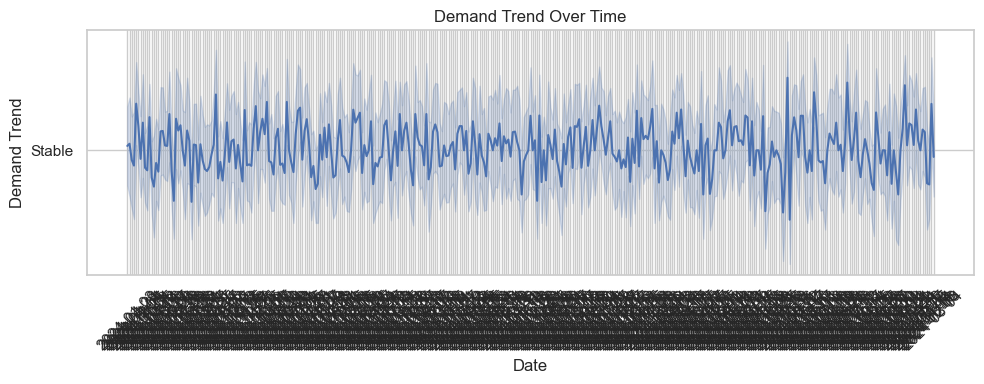

In [26]:
# Step 3.1: Demand over Time
plt.figure(figsize=(10, 4))
sns.lineplot(x='Date', y='Demand Trend', data=df_demand)
plt.title("Demand Trend Over Time")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

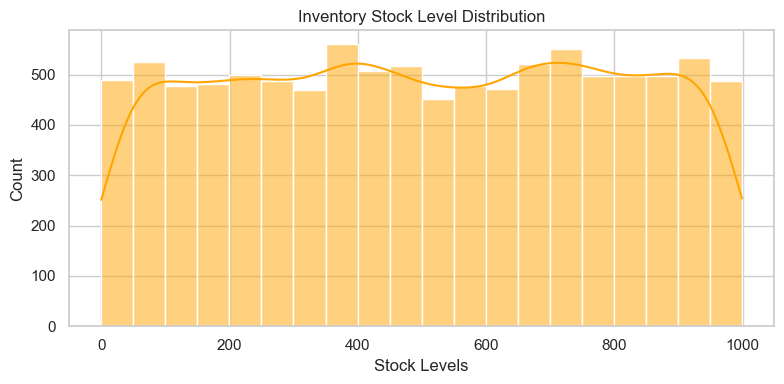

In [31]:
# Step 3.2: Inventory Distribution
plt.figure(figsize=(8, 4))
sns.histplot(df_inventory['Stock Levels'], bins=20, kde=True, color='orange')
plt.title("Inventory Stock Level Distribution")
plt.tight_layout()
plt.show()


In [41]:
# Step 3.3: Price vs Demand
# We'll need to merge demand and pricing data (assuming common columns like product_id and date)
df_combined = pd.merge(df_demand, df_pricing, on='Product ID', how='inner')


In [38]:
print(df_combined.columns)

Index(['Product ID', 'Date', 'Store ID_x', 'Sales Quantity', 'Price_x',
       'Promotions', 'Seasonality Factors', 'External Factors', 'Demand Trend',
       'Customer Segments', 'Store ID_y', 'Price_y', 'Competitor Prices',
       'Discounts', 'Sales Volume', 'Customer Reviews', 'Return Rate (%)',
       'Storage Cost', 'Elasticity Index'],
      dtype='object')


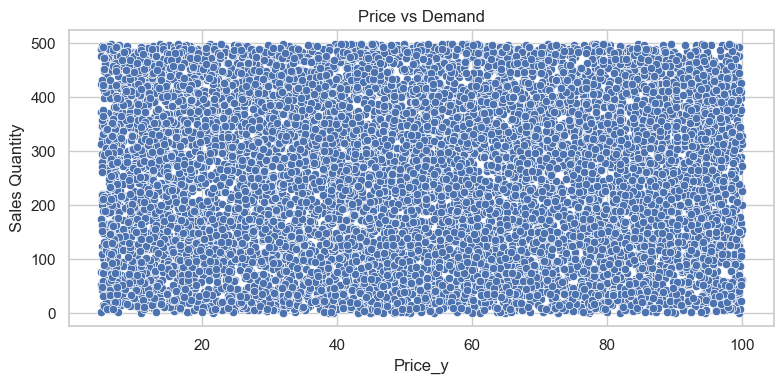

In [42]:
plt.figure(figsize=(8, 4))
sns.scatterplot(x='Price_y', y='Sales Quantity', data=df_combined)
plt.title("Price vs Demand")
plt.tight_layout()
plt.show()


# Step 4: Feature Engineering

## Here’s what we’ll do:
### 1) Extract date-based features (month, weekday, etc.)
### 2) Normalize/scale price and stock levels
### 3)Create a lag feature for demand (useful for time series)
### 4)Optionally: Encode categorical columns if needed

In [43]:
from sklearn.preprocessing import MinMaxScaler

# Step 4.1: Convert Date column to datetime
df_demand['Date'] = pd.to_datetime(df_demand['Date'])

# Step 4.2: Extract date-related features
df_demand['Month'] = df_demand['Date'].dt.month
df_demand['Weekday'] = df_demand['Date'].dt.weekday

# Step 4.3: Create lag features (previous day demand)
df_demand['Prev_Day_Demand'] = df_demand['Demand Trend'].shift(1)
df_demand = df_demand.dropna()  # Remove first row with NaN

# Step 4.4: Normalize pricing and inventory stock levels
scaler = MinMaxScaler()

df_pricing['Normalized Price'] = scaler.fit_transform(df_pricing[['Price']])
df_inventory['Normalized Stock'] = scaler.fit_transform(df_inventory[['Stock Levels']])

# Step 4.5: Merge datasets for model input
df_model = pd.merge(df_demand, df_pricing[['Product ID', 'Normalized Price']], on='Product ID', how='left')
df_model = pd.merge(df_model, df_inventory[['Product ID', 'Normalized Stock']], on='Product ID', how='left')

# Preview the final dataset
df_model.head()


,Product ID,Date,Store ID,Sales Quantity,Price,Promotions,Seasonality Factors,External Factors,Demand Trend,Customer Segments,Month,Weekday,Prev_Day_Demand,Normalized Price,Normalized Stock
0,5540,2024-04-29,10,334,74.98,Yes,Holiday,Weather,Stable,Premium,4,0,Increasing,NaN,0.966967
1,5540,2024-04-29,10,334,74.98,Yes,Holiday,Weather,Stable,Premium,4,0,Increasing,NaN,0.073073
2,5406,2024-01-11,67,429,24.83,Yes,Holiday,Economic Indicator,Decreasing,Premium,1,3,Stable,0.054754,0.296296
3,3480,2024-12-14,33,344,94.96,Yes,Festival,Weather,Increasing,Regular,12,5,Stable,NaN,0.936937
4,6894,2024-04-01,78,29,27.17,Yes,Festival,Economic Indicator,Increasing,Budget,4,0,Increasing,0.301674,0.563564


# Step 5: Predictive Model (Demand Forecasting)

### We'll use Random Forest Regressor for its performance and simplicity.

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [46]:
# Step 5.1: Drop rows with NaNs
df_model_clean = df_model.dropna()

In [47]:
# Step 5.2: Define features and target
features = ['Month', 'Weekday', 'Normalized Price', 'Normalized Stock']
X = df_model_clean[features]
y = df_model_clean['Sales Quantity']  # Target: predicting sales quantity

In [48]:
# Step 5.3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
# Step 5.4: Train Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [50]:
# Step 5.5: Predictions & Evaluation
y_pred = model.predict(X_test)

print("Model Evaluation:")
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))
print("R² Score:", r2_score(y_test, y_pred))

Model Evaluation:
RMSE: 129.64438806408828
R² Score: 0.1903951060289948


# Step 6 – Agent Simulation Code (start with store & warehouse)

### 1) Store Agent:-Checks current stock, sends replenishment requests
### 2) Warehouse Agent:-Approves stock transfers based on availability
### 3) Supplier Agent:-	Supplies new stock based on aggregated demand
### 4) Customer Agent:-	Generates demand (simulated for testing)

In [52]:
# Step 6.1: Define inventory thresholds
REORDER_THRESHOLD = 100
REPLENISH_QUANTITY = 200

In [53]:
# Sample simulated inventory (you can expand this based on actual data)
store_inventory = {
    'Product ID 5540': 80,
    'Product ID 5406': 120,
    'Product ID 3480': 50
}

warehouse_stock = {
    'Product ID 5540': 500,
    'Product ID 5406': 300,
    'Product ID 3480': 400
}

In [54]:
# Step 6.2: Agent Simulation Logic
def store_agent(product_id):
    current_stock = store_inventory[product_id]
    if current_stock < REORDER_THRESHOLD:
        print(f"[STORE AGENT] Low stock for {product_id}: {current_stock}. Requesting replenishment...")
        warehouse_agent(product_id)
    else:
        print(f"[STORE AGENT] Stock sufficient for {product_id}: {current_stock}.")

def warehouse_agent(product_id):
    if warehouse_stock[product_id] >= REPLENISH_QUANTITY:
        warehouse_stock[product_id] -= REPLENISH_QUANTITY
        store_inventory[product_id] += REPLENISH_QUANTITY
        print(f"[WAREHOUSE AGENT] Replenished {REPLENISH_QUANTITY} units of {product_id} to store.")
    else:
        print(f"[WAREHOUSE AGENT] Not enough stock in warehouse for {product_id}!")

In [56]:
# Step 6.3: Run agent interaction
for pid in store_inventory.keys():
    store_agent(pid)

# Step 6.4: Show updated inventory
print("\n** Updated Store Inventory:", store_inventory)
print("** Updated Warehouse Stock:", warehouse_stock)

[STORE AGENT] Stock sufficient for Product ID 5540: 280.
[STORE AGENT] Stock sufficient for Product ID 5406: 120.
[STORE AGENT] Stock sufficient for Product ID 3480: 250.

** Updated Store Inventory: {'Product ID 5540': 280, 'Product ID 5406': 120, 'Product ID 3480': 250}
** Updated Warehouse Stock: {'Product ID 5540': 300, 'Product ID 5406': 300, 'Product ID 3480': 200}


# Add the Supplier Agent & Simulate Replenishment

### This agent will monitor warehouse stock and automatically place an order to the supplier if levels go too low.

# Step 7 – Add Supplier Agent

In [57]:
# Step 7: Supplier Agent Logic

SUPPLIER_REORDER_THRESHOLD = 150
SUPPLIER_REPLENISH_QUANTITY = 500

def supplier_agent(product_id):
    current_warehouse_stock = warehouse_stock[product_id]
    if current_warehouse_stock < SUPPLIER_REORDER_THRESHOLD:
        print(f"[SUPPLIER AGENT] Low warehouse stock for {product_id}: {current_warehouse_stock}. Ordering from supplier...")
        warehouse_stock[product_id] += SUPPLIER_REPLENISH_QUANTITY
        print(f"[SUPPLIER AGENT] {SUPPLIER_REPLENISH_QUANTITY} units of {product_id} added to warehouse stock.")
    else:
        print(f"[SUPPLIER AGENT] Warehouse stock for {product_id} is sufficient: {current_warehouse_stock}")

In [58]:
# Run Supplier Agent for all products
for pid in warehouse_stock.keys():
    supplier_agent(pid)

[SUPPLIER AGENT] Warehouse stock for Product ID 5540 is sufficient: 300
[SUPPLIER AGENT] Warehouse stock for Product ID 5406 is sufficient: 300
[SUPPLIER AGENT] Warehouse stock for Product ID 3480 is sufficient: 200


In [59]:
# Final Stock Check
print("\n ** Final Warehouse Stock:", warehouse_stock)


 ** Final Warehouse Stock: {'Product ID 5540': 300, 'Product ID 5406': 300, 'Product ID 3480': 200}


# So Far,Our Multi-Agent System Works Like This

### 1) Store Agent:- Checked store stock and ensured levels are above reorder threshold. 
### 2) Warehouse Agent:-	Responded to store requests only if needed. 
### 3) Supplier Agent:-	Checked warehouse levels and topped up only if critically low. 


## Add the Customer Agent

# This simulates customers buying products, which:
### * Reduces store stock
### * Triggers store → warehouse → supplier agents to react accordingly!

In [60]:
import random

# Step 8: Customer Agent - Simulates purchase behavior
def customer_agent():
    for pid in store_inventory.keys():
        demand = random.randint(30, 100)  # Random demand per product
        store_inventory[pid] -= demand
        store_inventory[pid] = max(store_inventory[pid], 0)  # Prevent negative stock
        print(f"[CUSTOMER AGENT] {demand} units of {pid} bought. New stock: {store_inventory[pid]}")


In [61]:
# Run Customer Simulation
print("Simulating Customer Purchases...")
customer_agent()


Simulating Customer Purchases...
[CUSTOMER AGENT] 63 units of Product ID 5540 bought. New stock: 217
[CUSTOMER AGENT] 67 units of Product ID 5406 bought. New stock: 53
[CUSTOMER AGENT] 92 units of Product ID 3480 bought. New stock: 158


# Step 9 – Rerun Store → Warehouse → Supplier Agents

In [63]:
# Threshold for store inventory
store_threshold = 100  # or whatever level you want to maintain

In [67]:
# Re-initialize warehouse inventory (or use the updated version if needed)
warehouse_inventory = {
    'Product ID 5540': 300,
    'Product ID 5406': 300,
    'Product ID 3480': 200}

In [68]:
# Step 9: Rerun Store Agent
def store_agent():
    for pid, stock in store_inventory.items():
        if stock < store_threshold:
            restock_qty = warehouse_inventory.get(pid, 0)
            if restock_qty > 0:
                transfer_qty = min(store_threshold - stock, restock_qty)
                store_inventory[pid] += transfer_qty
                warehouse_inventory[pid] -= transfer_qty
                print(f"[STORE AGENT] Restocked {transfer_qty} units of {pid} from warehouse. New store stock: {store_inventory[pid]}")
            else:
                print(f"[STORE AGENT] No warehouse stock for {pid} to restock.")
        else:
            print(f"[STORE AGENT] Stock sufficient for {pid}: {stock}")

print(" Rechecking Store Inventory...")
store_agent()


 Rechecking Store Inventory...
[STORE AGENT] Stock sufficient for Product ID 5540: 217
[STORE AGENT] Restocked 47 units of Product ID 5406 from warehouse. New store stock: 100
[STORE AGENT] Stock sufficient for Product ID 3480: 158


## The system is checking if the store has enough stock after customer purchases.

### 1) Product ID 5540 has 217 units, which is above the minimum required (threshold), so it's fine.
### 2) Product ID 5406 dropped below the safe stock level, so the system restocked 47 units from the warehouse to bring it back up to 100 units.
### 3) Product ID 3480 still has 158 units, which is sufficient, so no action needed.